# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Creating URL query
url_query = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=Imperial&q="

# Creating lists to append data from API requests
clouds = []
dates = []
humidity = []
lats = []
lons = []
max_temps = []
wind_speed = []
city_name = []
country = []

#Setting the counter to begin the call
count = 0 
set_group =1

print("Beginning Data Retrieval")
print("-----------------------------")


# Using cities in the "cities" list sending API requesrts to retrieve information for the empty lists above
for city in cities:
    
    try:
        response = requests.get(url_query + city.replace(" ","&")).json() 
        clouds.append(response["clouds"]["all"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(city)
        country.append(response["sys"]["country"])
        cities_count = response["name"]
        print(f"Processing Record {count} of Set {set_group} | {city}")
        print(f"{url_query}{city}")
        if count > 49:
            count= 1
            set_group += 1
        else:
            count += 1
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | isabela
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=isabela
Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=rikitea
Processing Record 2 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=qaanaaq
Processing Record 3 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=tuktoyaktuk
City not found. Skipping...
Processing Record 4 of Set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mahebourg
Processing Record 5 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=bluff
Processin

Processing Record 2 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=dikson
Processing Record 3 of Set 2 | yanam
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=yanam
Processing Record 4 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=vaini
Processing Record 5 of Set 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=saskylakh
Processing Record 6 of Set 2 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mayo
Processing Record 7 of Set 2 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=richards bay
Processing Record 8 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=79982fc534

Processing Record 5 of Set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=cherskiy
Processing Record 6 of Set 3 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=inhambane
Processing Record 7 of Set 3 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mys shmidta
Processing Record 8 of Set 3 | east london
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=east london
Processing Record 9 of Set 3 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=mount gambier
Processing Record 10 of Set 3 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=saint-pierre
Processing Record 11 of Set 3 | egvekinot
http://api.op

Processing Record 10 of Set 4 | abu kamal
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=abu kamal
City not found. Skipping...
Processing Record 11 of Set 4 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=carnarvon
Processing Record 12 of Set 4 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=puerto ayora
Processing Record 13 of Set 4 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sao joao da barra
Processing Record 14 of Set 4 | nizhniy baskunchak
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=nizhniy baskunchak
Processing Record 15 of Set 4 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=namatanai
Ci

Processing Record 12 of Set 5 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sabang
Processing Record 13 of Set 5 | buala
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=buala
Processing Record 14 of Set 5 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=port macquarie
Processing Record 15 of Set 5 | nagornskiy
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=nagornskiy
Processing Record 16 of Set 5 | glendive
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=glendive
Processing Record 17 of Set 5 | sun valley
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sun valley
Processing Record 18 of Set 5 | tanabe
http://api.openweathermap.org/dat

Processing Record 13 of Set 6 | motygino
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=motygino
Processing Record 14 of Set 6 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=pimentel
Processing Record 15 of Set 6 | kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=kungurtug
Processing Record 16 of Set 6 | odder
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=odder
Processing Record 17 of Set 6 | roald
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=roald
Processing Record 18 of Set 6 | maun
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=maun
Processing Record 19 of Set 6 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=79982fc534

Processing Record 17 of Set 7 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=beloha
City not found. Skipping...
Processing Record 18 of Set 7 | rudnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=rudnogorsk
Processing Record 19 of Set 7 | faya
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=faya
Processing Record 20 of Set 7 | pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=pringsewu
Processing Record 21 of Set 7 | dustlik
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=dustlik
City not found. Skipping...
Processing Record 22 of Set 7 | baghmara
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=baghmara
Processing Record 23 of Set 7 | au

Processing Record 20 of Set 8 | sierra vista
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sierra vista
Processing Record 21 of Set 8 | maues
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=maues
Processing Record 22 of Set 8 | alyangula
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=alyangula
Processing Record 23 of Set 8 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=kiama
Processing Record 24 of Set 8 | craig
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=craig
Processing Record 25 of Set 8 | padang
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=padang
Processing Record 26 of Set 8 | gambela
http://api.openweathermap.org/data/2.5/weather?appid=7

Processing Record 23 of Set 9 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=cockburn town
Processing Record 24 of Set 9 | magdagachi
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=magdagachi
Processing Record 25 of Set 9 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=saint-joseph
Processing Record 26 of Set 9 | katwa
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=katwa
Processing Record 27 of Set 9 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=ahipara
Processing Record 28 of Set 9 | lunenburg
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=lunenburg
Processing Record 29 of Set 9 | bandarbeyla
http://api.openweather

Processing Record 26 of Set 10 | pinhao
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=pinhao
Processing Record 27 of Set 10 | akureyri
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=akureyri
City not found. Skipping...
Processing Record 28 of Set 10 | jiexiu
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=jiexiu
Processing Record 29 of Set 10 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=riyadh
Processing Record 30 of Set 10 | changde
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=changde
Processing Record 31 of Set 10 | sena madureira
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=sena madureira
Processing Record 32 of Set 10 | ludwigslust
http:

Processing Record 28 of Set 11 | campbell river
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=campbell river
Processing Record 29 of Set 11 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=isangel
Processing Record 30 of Set 11 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=half moon bay
Processing Record 31 of Set 11 | villa carlos paz
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=villa carlos paz
Processing Record 32 of Set 11 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=taoudenni
Processing Record 33 of Set 11 | kozhva
http://api.openweathermap.org/data/2.5/weather?appid=79982fc5345c5fd42b83d3c44af3b77a&units=Imperial&q=kozhva
Processing Record 34 of Set 11 | beringovs

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
        * Display the DataFrame

In [15]:
city_weather = {
    "City":city_name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":max_temps,
    "Wind Speed":wind_speed
    
}

city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv("City_Weather.csv")
city_weather_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [14]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,isabela,78,PH,1578386550,77,10.20,122.99,75.85,8.99
1,rikitea,0,PF,1578386550,80,-23.12,-134.97,76.60,15.70
2,qaanaaq,23,GL,1578386550,83,77.48,-69.36,-22.16,1.90
3,tuktoyaktuk,24,CA,1578386551,98,69.44,-133.03,-22.95,9.37
4,mahebourg,40,MU,1578386551,79,-20.41,57.70,86.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

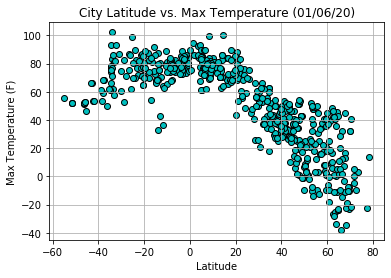

In [16]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Max Temperature (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

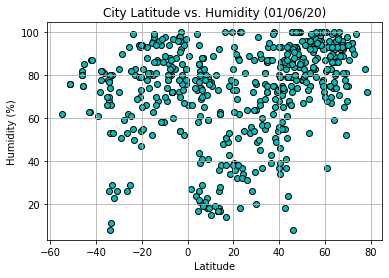

In [17]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Humidity (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

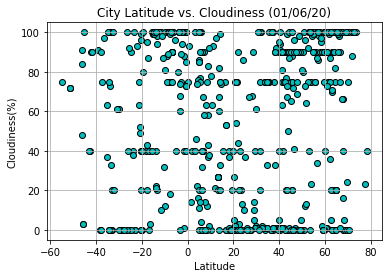

In [18]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Cloudiness (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

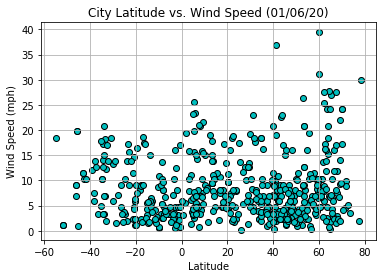

In [19]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"],facecolors="c",edgecolors="k")
plt.title("City Latitude vs. Wind Speed (01/06/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Lat_vs_Wind.png")
plt.show()